In [1]:
import pandas as pd
import os, sys, inspect
from rdkit import Chem

sys.path
sys.path.append('../../scripts/baseline_improvements/chemprop')

from features.molecule import create_molecule_for_smiles
from args import TrainArgs
from tqdm import tqdm

# logD dataset

In [2]:
logd_data = pd.read_csv('../../data/3_final_data/logd_Lip_wo_averaging.csv')

In [3]:
logd_data.head()

,smiles,logD
0,Brc1c[nH]c(=NCc2ccccc2)nc1N=c1cc(C2CC2)[nH][nH]1,4.11
1,Brc1cc(Br)cc(COC[C@H](c2ccccc2)N2CCNCC2)c1,2.80
2,C#CC(C)(C)NC(=O)c1sccc1Oc1ccc(F)cc1[N+](=O)[O-],3.00
3,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,3.59
4,C#CCC(C(=O)N=C(Cc1cc[nH]c1O)CCC(O)OCC)n1cccc(N...,1.75


In [4]:
usual_length = []
substr_length = []
merged_substr_length = []
with tqdm(total=logd_data.smiles.size) as pbar:
    for smi in logd_data.smiles:
        rdkit_mol = Chem.MolFromSmiles(smi)
        usual_length.append(rdkit_mol.GetNumAtoms())
        args = TrainArgs()
        mol = create_molecule_for_smiles(smi, args, rdkit_mol)
        substr_length.append(mol.get_num_atoms())
        args.substructures_merge = True
        mol = create_molecule_for_smiles(smi, args, rdkit_mol)
        merged_substr_length.append(mol.get_num_atoms())
        pbar.update(1)

  0%|                                                                                         | 0/4166 [00:00<?, ?it/s]C:\Users\lizzka239\anaconda3\envs\chemvae\lib\site-packages\tap\tap.py:304: UserWarning: add_arguments is deprecated and will be removed on January 1st, 2021 please override "configure" instead and call add_argument there. 
  warn('add_arguments is deprecated and will be removed on January 1st, 2021'
100%|██████████████████████████████████████████████████████████████████████████████| 4166/4166 [13:42<00:00,  5.07it/s]


In [5]:
logd_data['usual_length'] = pd.Series(usual_length)
logd_data['substr_length'] = pd.Series(substr_length)
logd_data['merged_substr_length'] = pd.Series(merged_substr_length)

In [6]:
logd_data.head()

,smiles,logD,usual_length,substr_length,merged_substr_length
0,Brc1c[nH]c(=NCc2ccccc2)nc1N=c1cc(C2CC2)[nH][nH]1,4.11,24,8,8
1,Brc1cc(Br)cc(COC[C@H](c2ccccc2)N2CCNCC2)c1,2.80,24,10,9
2,C#CC(C)(C)NC(=O)c1sccc1Oc1ccc(F)cc1[N+](=O)[O-],3.00,24,15,15
3,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,3.59,37,16,14
4,C#CCC(C(=O)N=C(Cc1cc[nH]c1O)CCC(O)OCC)n1cccc(N...,1.75,38,25,25


In [7]:
logd_data.describe()

,logD,usual_length,substr_length,merged_substr_length
count,4166.000000,4166.000000,4166.000000,4166.000000
mean,2.190850,27.032405,11.632261,10.885022
std,1.199709,7.466944,4.561560,4.711609
min,-1.500000,7.000000,2.000000,1.000000
25%,1.430000,22.000000,8.000000,8.000000
50%,2.360000,27.000000,11.000000,11.000000
75%,3.100000,32.000000,14.000000,14.000000
max,4.500000,115.000000,65.000000,64.000000


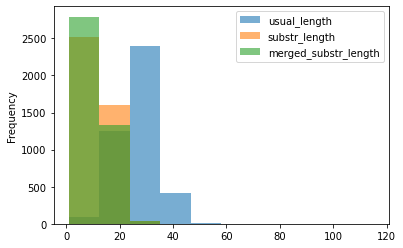

In [13]:
logd_data.drop(columns=['smiles', 'logD']).plot.hist(alpha=0.6)

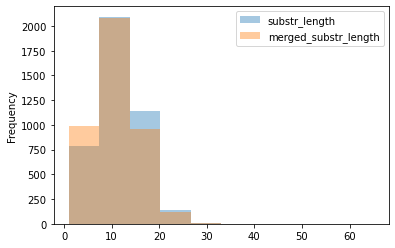

In [16]:
logd_data.drop(columns=['smiles', 'logD', 'usual_length']).plot.hist(alpha=0.4)

In [29]:
logd_data[logd_data.merged_substr_length < 25].size / logd_data.size

0.9949591934709554

In [34]:
logd_data[logd_data.merged_substr_length < 18].size / logd_data.size

0.9210273643783006

# logP dataset

In [9]:
logp_data = pd.read_csv('../../data/3_final_data/logp_wo_logp_json_wo_averaging.csv')

In [10]:
logp_data.head()

,smiles,logP
0,BrC(Br)(Br)Br,3.42
1,BrC1C2CC3C(C2)C13,3.11
2,BrC1CC2CCC1C2,3.54
3,BrC1CCCCC1,3.20
4,BrC=C(Br)Br,3.20


In [12]:
usual_length = []
substr_length = []
merged_substr_length = []
args = TrainArgs()

with tqdm(total=logp_data.smiles.size) as pbar:
    for smi in logp_data.smiles:
        
        rdkit_mol = Chem.MolFromSmiles(smi)
        usual_length.append(rdkit_mol.GetNumAtoms())
        
        args.substructures_merge = False
        mol = create_molecule_for_smiles(smi, args, rdkit_mol)
        substr_length.append(mol.get_num_atoms())
        
        args.substructures_merge = True
        mol = create_molecule_for_smiles(smi, args, rdkit_mol)
        merged_substr_length.append(mol.get_num_atoms())
        
        pbar.update(1)

100%|███████████████████████████████████████████████████████████████████████████| 13688/13688 [01:20<00:00, 169.82it/s]


In [17]:
logp_data['usual_length'] = pd.Series(usual_length)
logp_data['substr_length'] = pd.Series(substr_length)
logp_data['merged_substr_length'] = pd.Series(merged_substr_length)

In [18]:
logp_data.describe()

,logP,usual_length,substr_length,merged_substr_length
count,13688.000000,13688.000000,13688.000000,13688.000000
mean,2.126264,17.526885,9.231736,8.827878
std,1.867572,7.708335,4.861785,4.838024
min,-4.650000,5.000000,1.000000,1.000000
25%,0.890000,12.000000,6.000000,5.000000
50%,2.030000,16.000000,8.000000,8.000000
75%,3.250000,21.000000,12.000000,11.000000
max,9.960000,85.000000,57.000000,57.000000


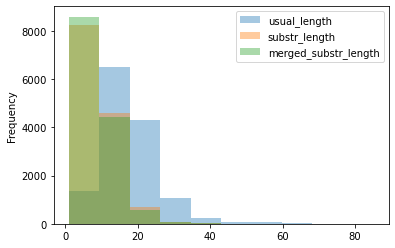

In [20]:
logp_data.drop(columns=['smiles', 'logP']).plot.hist(alpha=0.4)

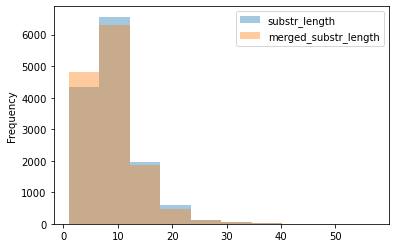

In [23]:
logp_data.drop(columns=['smiles', 'logP', 'usual_length']).plot.hist(alpha=0.4)

In [25]:
logp_data[logp_data.merged_substr_length < 25].size / logp_data.size

0.9886762127410871

In [35]:
logp_data[logp_data.merged_substr_length < 16].size / logp_data.size

0.9170075978959673